In [465]:
import pandas
import seaborn
seaborn.set()

In [466]:
from urllib.request import urlretrieve
URL = "https://go.gwu.edu/engcomp6data3"
urlretrieve(URL,"auto_mpg.csv")

('auto_mpg.csv', <http.client.HTTPMessage at 0x2ec96d492c8>)

In [467]:
mpg_data = pandas.read_csv("auto_mpg.csv")
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [468]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


In [469]:
y_col = "mpg"
x_cols = mpg_data.columns.drop(["car name","origin","mpg"])

print(x_cols)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


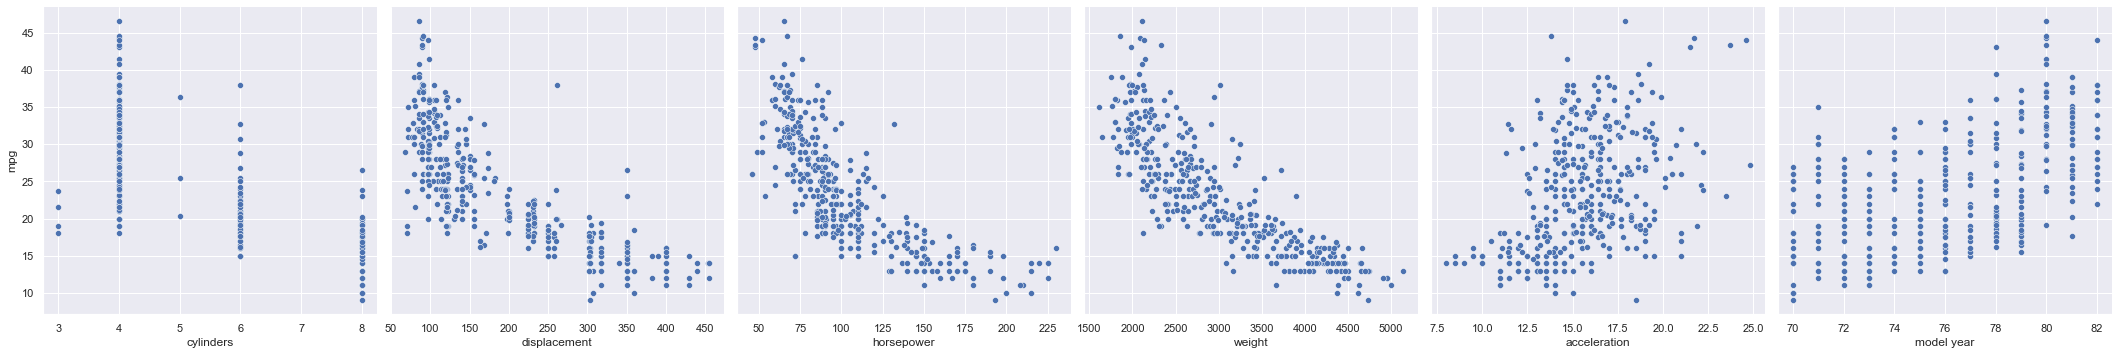

In [470]:
seaborn.pairplot(data=mpg_data,height=5,aspect=1,x_vars=x_cols,y_vars=y_col);

In [471]:
from autograd import numpy
from autograd import grad

In [472]:
X = mpg_data[x_cols].values
X = numpy.hstack((numpy.ones((X.shape[0],1)),X))
y = mpg_data[y_col].values
print("X.shape = {}, y.shape = {}".format(X.shape,y.shape))

X.shape = (392, 7), y.shape = (392,)


In [473]:
def linear_regression(params,X):
    '''
    The linear regression medel in matrix form.
    Arguments:
        params: 1D array of weights for the linear nodel
        X     : 2D array of input valus
    Returns:
        1D array of predicted values
    '''
    return numpy.dot(X,params)


def cost_function(params,model,X,y):
    '''
    The mean squared error loss function/
    Arguments:
        params: 1D array of weights for the linear model
        model : function for the linear regressoin model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
    float, mean squared error
    '''
    y_pred = model(params,X)
    #return numpy.mean(numpy.sum((y-y_pred)**2))\
    return numpy.mean(((y-y_pred)**2))

def cost_function1(params,model,X,y):
    '''
    The mean squared error loss function/
    Arguments:
        params: 1D array of weights for the linear model
        model : function for the linear regressoin model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
    float, mean squared error
    '''
    
    y_pred = model(params,X)
    print(y.shape)
    print(y_pred.shape)
    print(type(numpy.sum((y-y_pred)**2)))
    print((numpy.sum((y-y_pred)**2)).shape)
    return numpy.mean((y-y_pred)**2)

In [474]:
gradient = grad(cost_function)
#gradient1 = grad(cost_function1)

In [475]:
print(gradient(numpy.random.rand(X.shape[1]), linear_regression, X, y))
#print(gradient1(numpy.random.rand(X.shape[1]), linear_regression, X, y))


[1.53249985e+03 9.08688984e+03 3.42723179e+05 1.75553961e+05
 4.94760925e+06 2.32624209e+04 1.15887538e+05]


In [476]:
max_iter = 30
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params,linear_regression,X,y)
    params = params - descent*alpha
    loss = cost_function(params,linear_regression,X,y)
    if i%5 == 0:
        print("iteration {}, loss = {}".format(i,loss))

iteration 0, loss = 160493314183.57544
iteration 5, loss = 1.1489465429480531e+54
iteration 10, loss = 8.225128852088457e+96
iteration 15, loss = 5.88824128056207e+139
iteration 20, loss = 4.2152999669192746e+182
iteration 25, loss = 3.01766740941252e+225


In [477]:
mpg_data[x_cols].describe().loc[["max","min"]]

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


In [478]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0],1)),X_scaled))

pandas.DataFrame(X_scaled).describe().loc[["max","min"]]

,0,1,2,3,4,5,6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
max_iter = 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params,linear_regression,X_scaled,y)
    params = params - descent * alpha
    loss = cost_function(params,linear_regression,X_scaled,y)
    if i%100 == 0:
        print("iteration {},loss = {}".format(i,loss))

iteration 0,loss = 606.2268396994363
iteration 100,loss = 318.2365705335926
iteration 200,loss = 190.29265491547994
iteration 300,loss = 131.3629942272499
iteration 400,loss = 102.40245660796877
iteration 500,loss = 86.64323700831794
iteration 600,loss = 76.86580301417598
iteration 700,loss = 69.94494692253056
iteration 800,loss = 64.51278036227147
iteration 900,loss = 59.95716807914039


In [480]:
params

array([12.84859858,  1.72294818,  0.44561671,  1.39508724,  1.45009231,
        6.74467188,  8.35780042])

In [481]:
y_pred_gd = X_scaled @ params

In [482]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y,y_pred_gd)
rmse = mean_squared_error(y,y_pred_gd,squared=False)
print("mae = {}".format(mae))
print("rmse = {}".format(rmse))

mae = 6.311745597413132
rmse = 7.485292543865771


In [483]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x2ec9716ca88>)

In [484]:
import numpy
import sympy

In [485]:
fname = 'land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

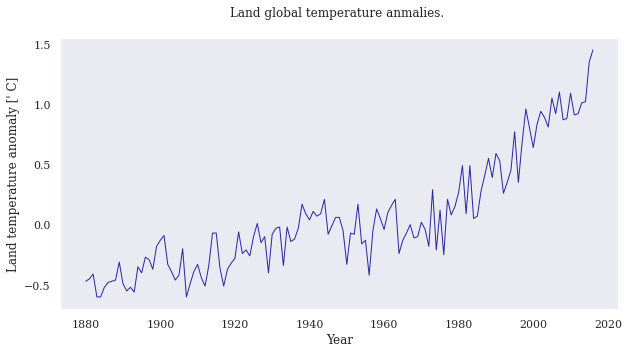

In [486]:
from matplotlib import pyplot
%matplotlib inline

pyplot.rc("font",family = "serif",size="18")

pyplot.figure(figsize=(10,5))

pyplot.plot(year,temp_anomaly,color="#2929a3",linestyle="-",linewidth=1)
pyplot.title("Land global temperature anmalies. \n")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [' C]")
pyplot.grid();

In [487]:
w,b,x,y = sympy.symbols("w b x y")

cost_function = (w*x + b - y) ** 2
cost_function

(b + w*x - y)**2

In [488]:
grad_b = sympy.lambdify([w,b,x,y], cost_function.diff(b), "numpy")
grad_w = sympy.lambdify([w,b,x,y], cost_function.diff(w),"numpy")

In [489]:
w=0
b=0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year,temp_anomaly))/len(year)
    descent_w = numpy.sum(grad_w(w,b,year,temp_anomaly))/len(year)
    w=w-descent_w*0.001
    b=b-descent_b*0.001

print(w)
print(b)

nan
nan


<string>:2: RuntimeWarning: overflow encountered in multiply
c:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [490]:
year_scaled = (year-year.mean())/year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

In [491]:
w=0
b=0
for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    descent_w = numpy.sum(grad_w(w,b,year_scaled,temp_anomaly_scaled))/len(year_scaled)
    w=w-descent_w*0.001
    b=b-descent_b*0.001
print(w)
print(b)

0.756766964479979
5.551763428541569e-17


In [492]:
reg = b+w*year_scaled

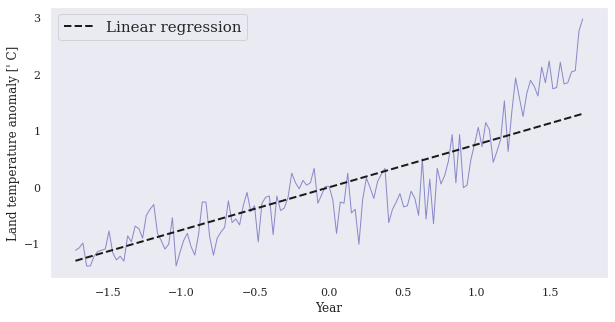

In [493]:
pyplot.figure(figsize=(10,5))

pyplot.plot(year_scaled,temp_anomaly_scaled,color="#2929a3",linestyle="-",linewidth=1,alpha=0.5)
pyplot.plot(year_scaled,reg,"k--",linewidth=2,label="Linear regression")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [' C]")
pyplot.legend(loc="best",fontsize=15)
pyplot.grid();